### Data
We're going to use a mail response data set from a real direct marketing campaign located in `data/mailing.csv`. Each record represents an individual who was targeted with a direct marketing offer.  The offer was a solicitation to make a charitable donation. 

The columns (features) are:

```
Col.  Name      Descriptiona
----- --------- ----------------------------------------------------------------
1     income    household income
2     Firstdate data assoc. with the first gift by this individual
3     Lastdate  data associated with the most recent gift 
4     Amount    average amount by this individual over all periods (incl. zeros)
5     rfaf2     frequency code
6     rfaa2     donation amount code
7     pepstrfl  flag indicating a star donator
8     glast     amount of last gift
9     gavr      amount of average gift
10    class     one if they gave in this campaign and zero otherwise.
```

Our goal is to build a model to predict if people will give during the current campaign (this is the attribute called `"class"`).

# Part 1: ROC curve

### Tasks

```
1. Randomly assign 75% of your data into training and the remaining 25% into test (do not use cross-validation now) (2 points)
2. Train a logistic regression model and use the test data to get the data to create an ROC curve (2 points)
3. Train a decision tree model (criterion="entropy") and use the test data to get the data to create an ROC curve (2 points)
4. Plot both ROC curves on one plot with legends (2 points)
5. Discuss which model has better performance (2 points)
```

In [1]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Import the libraries we will be using
import os
import math
import matplotlib.patches as patches
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn import datasets
from IPython.display import Image

%matplotlib inline

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

# Dataset Import
import statsmodels.api as sm

In [2]:
mail=pd.read_csv("mailing.csv")
mail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191779 entries, 0 to 191778
Data columns (total 12 columns):
Income        191779 non-null int64
Firstdate     191779 non-null int64
Lastdate      191779 non-null int64
Amount        191779 non-null float64
rfaf2         191779 non-null int64
glast         191779 non-null int64
gavr          191779 non-null float64
class         191779 non-null int64
rfaa2_G       191779 non-null int64
rfaa2_E       191779 non-null int64
rfaa2_F       191779 non-null int64
pepstrfl_0    191779 non-null int64
dtypes: float64(2), int64(10)
memory usage: 17.6 MB


In [3]:
mail.head()

,Income,Firstdate,Lastdate,Amount,rfaf2,glast,gavr,class,rfaa2_G,rfaa2_E,rfaa2_F,pepstrfl_0
0,3,9409,9509,0.06,1,50,30.00,0,1,0,0,1
1,2,9201,9602,0.16,4,20,20.55,1,1,0,0,0
2,0,9510,9603,0.20,4,5,8.75,0,0,1,0,1
3,6,9409,9603,0.13,2,25,22.50,0,1,0,0,1
4,0,9310,9511,0.10,1,25,12.50,0,1,0,0,1


In [4]:
# define X and y
feature_cols = ['Firstdate', 'Lastdate', 'Amount', 'rfaf2','glast' ,'gavr','rfaa2_G','rfaa2_E','rfaa2_F','pepstrfl_0','Income']
X = mail[feature_cols]
y = mail['class']

In [5]:
# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

In [6]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

In [8]:
# store the predicted probabilities for class 1
y_pred_prob_logmodel= logreg.predict_proba(X_test)[:, 1]

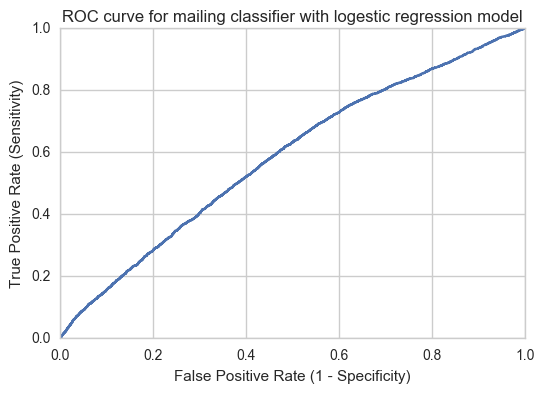

In [9]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr1, tpr1, thresholds = metrics.roc_curve(y_test, y_pred_prob_logmodel)
plt.plot(fpr1, tpr1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for mailing classifier with logestic regression model')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn import datasets

def entropy(target):
    # Get the number of users
    n = len(target)
    # Count how frequently each unique value occurs
    counts = np.bincount(target).astype(float)
    # Initialize entropy
    entropy = 0
    # If the split is perfect, return 0
    if len(counts) <= 1 or 0 in counts:
        return entropy
    # Otherwise, for each possible value, update entropy
    for count in counts:
        entropy += math.log(count/n, len(counts)) * count/n
    # Return entropy
    return -1 * entropy

In [11]:
decision_tree = DecisionTreeClassifier(max_depth=10, criterion="entropy")
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [12]:
# store the predicted probabilities for class 1
y_pred_prob_decmodel = decision_tree.predict_proba(X_test)[:, 1]

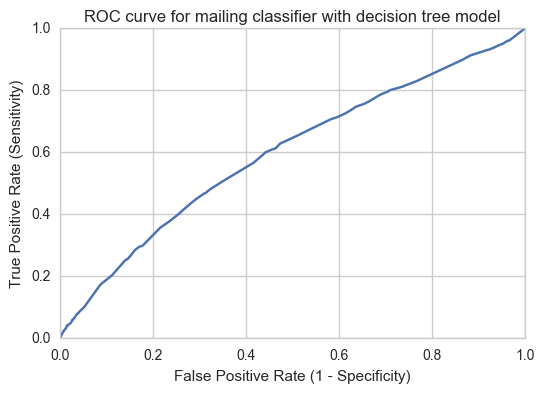

In [13]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr2, tpr2, thresholds = metrics.roc_curve(y_test, y_pred_prob_decmodel)
plt.plot(fpr2, tpr2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for mailing classifier with decision tree model')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

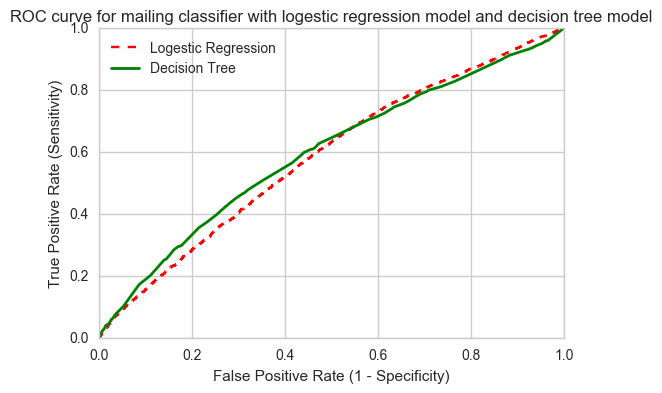

In [14]:
import matplotlib.pyplot as plt

line1= plt.plot(fpr1, tpr1, label="Logestic Regression", color='red', linestyle='--')
line2= plt.plot(fpr2, tpr2, label="Decision Tree", color='green', linewidth=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for mailing classifier with logestic regression model and decision tree model')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

# Part 2: Cross Validation

These models are using their default complexity parameters and the decision tree can be very large, which means it may has overfitting problem. Let's use cross validation to to identify the overfitting problem and control the complexity of our decision tree.
### Tasks
```
1. Build decision trees on the same data set with maximum tree depths varing from 1 to 15 (2.5 points)
2. For each maximum depth, perform 5 folds cross-validation, and get the mean accuracy (2.5 points)
3. Plot the mean accuracies over maximum depth (2.5 points)
4. Find out what is the optimal maximum depth for the decision tree (2.5 points)
```

In [15]:
# A function that gives a visual representation of the decision tree
def Decision_Tree_Image(decision_tree, feature_names, name="temp"):
    # Export our decision tree to graphviz format
    dot_file = tree.export_graphviz(decision_tree.tree_, out_file='images/' + name + '.dot', feature_names=feature_names)
    
    # Call graphviz to make an image file from our decision tree
    os.system("dot -Tpng images/" + name + ".dot -o images/" + name + ".png")
    
    # Return the .png image so we can see it
    return Image(filename='images/' + name + '.png')

# A function to plot the data
def Plot_Data(data, v1, v2, tv):
    # Make the plot square
    plt.rcParams['figure.figsize'] = [12.0, 8.0]
    
    # Color
    color = ["red" if x == 0 else "blue" for x in data[tv]]
    
    # Plot and label
    plt.scatter(data[v1], data[v2], c=color, s=50)
    plt.xlabel(v1)
    plt.ylabel(v2)
    plt.xlim([min(data[v1]) - 1, max(data[v1]) + 1])
    plt.ylim([min(data[v2]) - .05, max(data[v2]) + .05])
    
def Decision_Surface(x, y, model, cell_size=.01):
    # Get blob sizes for shading
    x = (min(x), max(x))
    y = (min(y), max(y))
    x_step = (x[1] - x[0]) * cell_size
    y_step = (y[1] - y[0]) * cell_size

    # Create blobs
    x_values = []
    y_values = []
    
    for i in np.arange(x[0], x[1], x_step):
        for j in np.arange(y[0], y[1], y_step):
            y_values.append(float(i))
            x_values.append(float(j))
    
    data_blob = pd.DataFrame({"x": x_values, "y": y_values})

    # Predict the blob labels
    label= decision_tree.predict(data_blob)
    
    # Color and plot them
    color = ["red" if l == 0 else "blue" for l in label]
    plt.scatter(data_blob['y'], data_blob['x'], marker='o', edgecolor='black', linewidth='0', c=color, alpha=0.3)
    
    # Get the raw decision tree rules
    decision_tree_raw = []
    for feature, left_c, right_c, threshold, value in zip(decision_tree.tree_.feature, 
                                                          decision_tree.tree_.children_left, 
                                                          decision_tree.tree_.children_right, 
                                                          decision_tree.tree_.threshold, 
                                                          decision_tree.tree_.value):
        decision_tree_raw.append([feature, left_c, right_c, threshold, value])


    # Used for formatting the boundry lines
    currentAxis = plt.gca()
    line_color = "black"
    line_width = 3

    # For each rule
    for row in decision_tree_raw:
        feature, left_c, right_c, threshold, value = row

        if threshold != -2:
            if feature == 0:
                plt.plot([20, 100], [threshold, threshold], c=line_color, linewidth=line_width)
            else:
                plt.plot([threshold, threshold], [0, 5], c=line_color, linewidth=line_width)

    plt.xlim([min(x) - 1, max(x) + 1])
    plt.ylim([min(y) - .05, max(y) + .05])
    plt.show()

In [16]:
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn import metrics

In [17]:
# search for an optimal value of D for Decision Tree Model
d_range = list(range(1, 16))
d_scores = []
for d in d_range:
    decision_tree =DecisionTreeClassifier(max_depth=d, criterion="entropy")
    scores = cross_val_score(decision_tree, X, y, cv=5, scoring='accuracy')
    d_scores.append(scores.mean())
print(d_scores)

[0.94933751885027584, 0.94933751885027584, 0.94935316191040131, 0.94945223430737491, 0.94942616303895133, 0.94935837689817715, 0.9492905914371601, 0.94918630337263221, 0.94881608885955893, 0.94833115589860972, 0.94780451187174974, 0.94716314518277078, 0.94598470761802778, 0.94472284058058009, 0.94349225245826407]


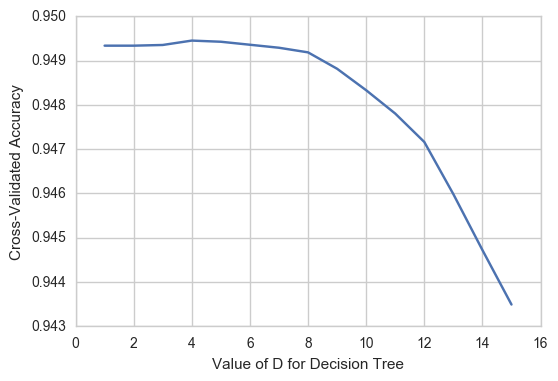

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
# plot the value of D for Decision Tree (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(d_range, d_scores)
plt.xlabel('Value of D for Decision Tree')
plt.ylabel('Cross-Validated Accuracy')